In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
df = pd.read_csv("felixstowe_rotterdam.csv", on_bad_lines='warn')

/tmp/ipykernel_8576/2562569177.py:1: ParserWarning: Skipping line 15514: expected 26 fields, saw 27
Skipping line 15517: expected 26 fields, saw 27
Skipping line 15518: expected 26 fields, saw 27
Skipping line 15520: expected 26 fields, saw 27
Skipping line 15523: expected 26 fields, saw 27

  df = pd.read_csv("felixstowe_rotterdam.csv", on_bad_lines='warn')
/tmp/ipykernel_8576/2562569177.py:1: ParserWarning: Skipping line 35119: expected 26 fields, saw 27
Skipping line 38044: expected 26 fields, saw 27
Skipping line 38051: expected 26 fields, saw 27
Skipping line 38052: expected 26 fields, saw 27
Skipping line 38072: expected 26 fields, saw 27
Skipping line 38073: expected 26 fields, saw 27
Skipping line 38075: expected 26 fields, saw 27
Skipping line 38076: expected 26 fields, saw 27
Skipping line 38077: expected 26 fields, saw 27
Skipping line 38078: expected 26 fields, saw 27
Skipping line 38079: expected 26 fields, saw 27
Skipping line 38081: expected 26 fields, saw 27
Skipping li

In [3]:
pd.options.display.max_columns = None

In [4]:
df.head()

,TripID,MMSI,StartLatitude,StartLongitude,StartTime,EndLatitude,EndLongitude,EndTime,StartPort,EndPort,ID,time,shiptype,Length,Breadth,Draught,Latitude,Longitude,SOG,COG,TH,Destination,Name,Callsign,AisSourcen,d
0,40903,220284000,51.95,1.31,'2016-01-21 08:46',51.9,4.36,'2016-01-21 17:17',FELIXSTOWE,ROTTERDAM,39542658,'2016-01-21 08:47',79,196,26,6.68,51.95,1.31,1.2,264.0,297,RTM-FXT-RTM,SUECIA.SEAWAYS,OVPB2,H7001,511
1,40903,220284000,51.95,1.31,'2016-01-21 08:46',51.9,4.36,'2016-01-21 17:17',FELIXSTOWE,ROTTERDAM,39543951,'2016-01-21 08:48',79,196,26,6.68,51.95,1.31,2.3,285.0,293,RTM-FXT-RTM,SUECIA.SEAWAYS,OVPB2,H7001,511
2,40903,220284000,51.95,1.31,'2016-01-21 08:46',51.9,4.36,'2016-01-21 17:17',FELIXSTOWE,ROTTERDAM,39545048,'2016-01-21 08:49',79,196,26,6.68,51.95,1.30,4.6,280.0,262,RTM-FXT-RTM,SUECIA.SEAWAYS,OVPB2,H7001,511
3,40903,220284000,51.95,1.31,'2016-01-21 08:46',51.9,4.36,'2016-01-21 17:17',FELIXSTOWE,ROTTERDAM,39545774,'2016-01-21 08:50',79,196,26,6.68,51.95,1.30,3.7,251.0,218,RTM-FXT-RTM,SUECIA.SEAWAYS,OVPB2,H7001,511
4,40903,220284000,51.95,1.31,'2016-01-21 08:46',51.9,4.36,'2016-01-21 17:17',FELIXSTOWE,ROTTERDAM,39547226,'2016-01-21 08:51',79,196,26,6.68,51.95,1.30,3.8,210.0,180,RTM-FXT-RTM,SUECIA.SEAWAYS,OVPB2,H7001,511


In [5]:
duplicated_rows = df[df.duplicated(keep=False)]

## Check for duplicate Data
There exists a lot of duplicate data in the dataset. 
I found 15197 duplicate rows in the dataset.

In [6]:
duplicated_rows

,TripID,MMSI,StartLatitude,StartLongitude,StartTime,EndLatitude,EndLongitude,EndTime,StartPort,EndPort,ID,time,shiptype,Length,Breadth,Draught,Latitude,Longitude,SOG,COG,TH,Destination,Name,Callsign,AisSourcen,d
155116,536243,210720000,51.89,1.68,'2016-09-12 16:49',51.89,4.43,'2016-09-13 03:59',FELIXSTOWE,ROTTERDAM,522271530,'2016-09-12 16:54',71,222,30,7.8,51.89,1.68,8.8,158.0,158,ROTTERDAM,HARMONY.N,5BXU3,H7001,670
155117,536243,210720000,51.89,1.68,'2016-09-12 16:49',51.89,4.43,'2016-09-13 03:59',FELIXSTOWE,ROTTERDAM,522271530,'2016-09-12 16:54',71,222,30,7.8,51.89,1.68,8.8,158.0,158,ROTTERDAM,HARMONY.N,5BXU3,H7001,670
155118,536243,210720000,51.89,1.68,'2016-09-12 16:49',51.89,4.43,'2016-09-13 03:59',FELIXSTOWE,ROTTERDAM,522280877,'2016-09-12 16:58',71,222,30,7.8,51.88,1.69,10.5,158.0,158,ROTTERDAM,HARMONY.N,5BXU3,H7001,670
155119,536243,210720000,51.89,1.68,'2016-09-12 16:49',51.89,4.43,'2016-09-13 03:59',FELIXSTOWE,ROTTERDAM,522280877,'2016-09-12 16:58',71,222,30,7.8,51.88,1.69,10.5,158.0,158,ROTTERDAM,HARMONY.N,5BXU3,H7001,670
155120,536243,210720000,51.89,1.68,'2016-09-12 16:49',51.89,4.43,'2016-09-13 03:59',FELIXSTOWE,ROTTERDAM,522284594,'2016-09-12 16:59',71,222,30,7.8,51.87,1.69,10.8,158.0,158,ROTTERDAM,HARMONY.N,5BXU3,H7001,670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303143,892382,209719000,51.95,1.30,'2016-09-03 02:59',51.95,4.04,'2016-09-03 10:51',FELIXSTOWE,ROTTERDAM,498741940,'2016-09-03 10:14',79,139,22,7,51.98,4.05,11.5,112.5,113,ROTTERDAM,BG.IRELAND,5BBU3,H7001,472
303144,892382,209719000,51.95,1.30,'2016-09-03 02:59',51.95,4.04,'2016-09-03 10:51',FELIXSTOWE,ROTTERDAM,498742789,'2016-09-03 10:15',79,139,22,7,51.98,4.05,10.4,112.7,116,ROTTERDAM,BG.IRELAND,5BBU3,H7001,472
303145,892382,209719000,51.95,1.30,'2016-09-03 02:59',51.95,4.04,'2016-09-03 10:51',FELIXSTOWE,ROTTERDAM,498742789,'2016-09-03 10:15',79,139,22,7,51.98,4.05,10.4,112.7,116,ROTTERDAM,BG.IRELAND,5BBU3,H7001,472
303146,892382,209719000,51.95,1.30,'2016-09-03 02:59',51.95,4.04,'2016-09-03 10:51',FELIXSTOWE,ROTTERDAM,498700711,'2016-09-03 09:53',79,139,22,7,51.99,3.92,14.0,73.3,75,ROTTERDAM,BG.IRELAND,5BBU3,H7001,472


In [7]:
sum_of_duplicated_rows = len(duplicated_rows)

In [8]:
total_rows_dataset = len(df)

In [9]:
print("Number of duplicated rows:", sum_of_duplicated_rows)
print("Number of rows in original data:", total_rows_dataset)

Number of duplicated rows: 15197
Number of rows in original data: 527312


In [10]:
no_duplicates = df.drop_duplicates()

In [11]:
no_duplicates_size = len(no_duplicates)
print(no_duplicates_size)

517569


In [12]:
#no_duplicates.to_csv('felixstowe_rotterdam_3.csv', index = False)

## Checking for missing data

Missing data are marked with the '?' Character. 
Still deciding on how to handle those.

1. Replaced all '?' values in the "AisSourcen" Column to H7001

In [13]:
df.isnull().sum()

TripID            0
MMSI              0
StartLatitude     0
StartLongitude    0
StartTime         0
EndLatitude       0
EndLongitude      0
EndTime           0
StartPort         0
EndPort           0
ID                0
time              0
shiptype          0
Length            0
Breadth           0
Draught           0
Latitude          0
Longitude         0
SOG               0
COG               0
TH                0
Destination       0
Name              0
Callsign          0
AisSourcen        0
d                 0
dtype: int64

In [14]:
no_duplicates["AisSourcen"].replace({'?': 'H7001'}, inplace = True)

/tmp/ipykernel_8576/2474779066.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  no_duplicates["AisSourcen"].replace({'?': 'H7001'}, inplace = True)
/tmp/ipykernel_8576/2474779066.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_duplicates["AisSourcen"].replace({'?': 'H7001'}, inplace = True)


In [15]:
no_duplicates.loc[no_duplicates['AisSourcen'] == '?']

,TripID,MMSI,StartLatitude,StartLongitude,StartTime,EndLatitude,EndLongitude,EndTime,StartPort,EndPort,ID,time,shiptype,Length,Breadth,Draught,Latitude,Longitude,SOG,COG,TH,Destination,Name,Callsign,AisSourcen,d


## Some Analysis
The values in the Destination column look similar for some ships eg. they may be separated by  = or - etc. \n
It currently seems like each ship has a specific Destianation so i will have to wait on completely renaming all similar destinations to one instance. There might be a need to uniquely identify the destination for a ship. Below i will try to get all unique values in the Destination, Name, Callsign, Shiptype and MMSI column.

FUTURE proposal --> All the details of a trip should definitely contain 1 unique MMSI, Destination, Name, Callsign and Type. Check that later.

MMSI and callsigns are intended to be unique. However, after the transfer of ownership of a ship, a vessel owner can choose to keep the MMSI or callsign.

I made a mess with the AisSources: There were missing values for which I replaced all with H7001 before checking for unique values in the columns. Depending on how important or how the relationship between AIS Source and the Ship route OR predictive model is, I will have to re-handle the AIS Source column.

Checking if the max and min values of the Longitudes and Latitudes within valid ranges (-90 to 90 for latitude, -180 to 180 for longitude) 

Unique Values in Identifier Columns
1. TripID: 1599
2. MMSI: 141
3. Shiptpye: 11
4. Destination: 98
5. Name: 152
6. Callsign: 172
7. AisSourcen : 8 or 9 (depending on if the empty value is considered).

In [16]:
no_duplicates["Destination"].unique()

array(['RTM-FXT-RTM', '?', 'FELIXSTOWE', 'ROTTERDAM',
       'MISTLEY.-.ROTTERDAM', 'RTM-FXT/ATALINA.IS', 'ROT.-.FLX.-.ROT',
       'RTM.-.FLX.-.RTM', 'FXT=RTM=FXT', 'NLRTM', 'ROT.-.FL',
       'RTM.FXT.RTM', 'IPSWICH', 'RTM=FXT=RTM', 'ROTTERDEM',
       'RTM-FXT-RTMA', 'PURFLEET', 'RTM/FXT/RTM', 'RTM-FXT', 'FXT-RTM',
       'FLX-RTM-FLX', 'RTM/FXT-M', 'MAAS.PILOT', 'MAAS.PIL', 'MAAS..PIL',
       'GBFXT>NLRTM', 'LE.HAVRE', 'NL.ROTTERDAM', 'ROTTERD',
       'NL..MOERDIJK', 'MOERDIJK', 'NLMOE', 'MOERDJK', 'MORDIJK',
       'ROTERDAM', 'MAERDIJK', 'FELIXSTOW', 'MAAS', 'FELIXTOWE',
       'ROTTREDAM', 'EUROPOORT', 'HARWICH', 'NL.RTM', 'ROTTERDAM.NL',
       'RTM', 'GBFXS>>NLROT', 'GBFXS=ET', 'EUROPOOPXX.COSMO.2',
       'EUROPNESS', 'NLEUR', 'GBHRW', 'ROTTERDCITY',
       'ROTTERDBRY/STRANGFOR', 'FXT-RTM-FXT', 'MVII.ROTTERDAM',
       'ROTTERDAM.RST', 'RTM.APM', ':TM-FXT-RTM', 'ROTTERDAM.RST.ZZ',
       'RTM-FXT-RTM$IBTT.&', 'GBFXT----NLRTM', 'GBFXT----NLRTL',
       'GBFXT=NLRTM', 'RTM.S

In [17]:
len(no_duplicates["Destination"].unique())

98

In [18]:
no_duplicates["MMSI"].unique()

array([220284000, 211226860, 246655000, 273334000, 351848000, 356708000,
       219825000, 636015674, 219292000, 235084298, 636016985, 235097248,
       353051000, 354505000, 477712400, 304010658, 220005000, 211801000,
       477652300, 244850087, 229928000, 255805596, 304010672, 636017346,
       477427500, 255805627, 356581000, 477213400, 220478000, 244850968,
       477963800, 220501000, 354972000, 255805557, 255805577, 246363000,
       305648000, 636015670, 373517000, 235071275, 255805597, 477424600,
       229929000, 565449000, 305198000, 220497000, 353612000, 636092147,
       255805595, 255805661, 210720000, 308218000, 636015181, 236111947,
       477698600, 477271400, 636091501, 218814000, 235095629, 314025000,
       538004007, 210604000, 538005839, 563111000, 229930000, 255805578,
       220503000, 244144000, 354776000, 305918000, 240725000, 304108000,
       477712800, 636017408, 477219900, 477967800, 209850000, 563108000,
       220499000, 212963000, 477967700, 219458000, 

In [19]:
len(no_duplicates["MMSI"].unique())

141

In [20]:
no_duplicates["Callsign"].unique()


array(['OVPB2', '?', 'DPGK', 'OW0=R', 'PBWZ', '*_0=R', '*^PB2', 'UAEG',
       '3FMO6', ']&MO6', '3FLG6', 'OZTS2', 'OZTS9QO', 'D5CD9', 'OZHV2',
       '2EDZ5', 'D5IS6', "'OX ='", '2GGS3', '3EXO7', 'HOHA', 'VRNU2', '*',
       'OY$=', 'V2VI', 'OWFT2', 'DCPX2', 'VRML8', 'PCZQ', '9HA3725',
       'CQHU', 'V2PR2', 'D5KM4', 'VRLT8', 'CQFZ', '3ELQ8', 'VRIL4',
       'OVXO2', 'PBQC', 'VRHM7', 'OXOR2', '3FTS', '<NQC', 'HPSB', 'CQIH',
       'CQHB', 'PHDA', 'V2FE2', 'D5CD5', '3EXN', '2CBJ6', 'PH)', 'CQHV',
       'VRJG2', '9HA3726', 'S6CH2', 'V2PT6', 'OXHW2', '3FVZ7', 'A8XP9',
       'CQHT', 'CQGL', '5BXU3', 'C6WF8', 'A8IM4', 'ZDNJ6', 'VRNP8',
       'VRNI6', 'A8OT2', 'A;0G', '5W0G', 'DGCX2', '2FZV8', '8PMA',
       'V7UQ8', 'SUGL', 'P3TW9', 'V7HL4', '9V2245', '9HA3727', 'CQHC',
       'OXOS2', 'PBUE', '3FWG6', 'V2GF2', 'SYKN', 'V2OF7', 'VRNV5',
       'D5KU2', 'VRMR5', 'VROE2', '5BKR3', '9V2244', 'OXHY2', '2G+HX',
       '5BKD4', 'VROD9', 'OWLH2', 'OVP=R', '9HA3852', 'OWL82AP', 'C4YC2',
      

In [21]:
len(no_duplicates["Callsign"].unique())

172

In [22]:
no_duplicates["Name"].unique()

array(['SUECIA.SEAWAYS', '?', 'GERDA', 'SCHOKLAND', 'SUOYARVI',
       'MSC.KATIE', 'FORTUNATE', 'SUECIA.SEAWAYP.', 'BRITANNIA.SEAWAYS',
       'MSC.KORONI', 'ANGLIA.SEAWAYS', 'MAERSK.ERVING', 'ANLIGA.SEAWAYS',
       'MAIRA.XL', 'BRDAINIA.SEAWAYS', 'CELTIC.CRUSADER', 'MSC.GAIA',
       'MSC.INGRID', 'CSCL.GLOBE', 'BI-0CA3P70', 'PAPER.STAR',
       'LUNA.MAERSK', 'NORTHERN.MONUMENT', 'COSCO.ENGLAND',
       'NORTHERN.ROCK', 'AL.MURAYKH', 'MSC.KLEVEN', 'PAPER.MOON',
       'MSC.SHAULA', 'COSCO.BELGIUM', 'ANNAMARIE', 'COSCO.ASIA',
       'CSCL.JUPITER', 'ESTELLE.MAERSK', 'SPIRIT', 'CSCL.STAR',
       'EDITH.MAERSK', 'MSC.MARINA', 'ALANA', 'IRIS.BOLTEN', 'ELITE',
       'PHOENIX.J', 'RIVER.TRADER', 'MSC.DYMPHNA', 'CMA.CGM.AQUILA',
       'MSC.KARLSKRONA', 'CSCL.MARS', 'AL.ZUBARA', 'MAERSK.SERANGOON',
       'DOLFIJN', 'EBBA.MAERSK', 'MSC.BRIANNA', 'CMA.CGM.ALASKA',
       'MAERSK.KOTKA', 'SCHUBERT', 'HARMONY.N', 'SWAMI', 'POHORJE',
       'MSC.LOS.ANGELES', 'COSCO.DENMARK', 'COSODENMARK',

In [23]:
len(no_duplicates["Name"].unique())

152

In [24]:
no_duplicates["TripID"].unique()

array([  40903,   40905,   40907, ..., 2180527, 2193708, 2195598])

In [25]:
len(no_duplicates["TripID"].unique())

1599

In [26]:
no_duplicates["shiptype"].unique()

array([ 79,   0,  71,  70,  73,  74,  72, 142,  69, 139,   4])

In [27]:
len(no_duplicates["shiptype"].unique())

11

In [28]:
no_duplicates["AisSourcen"].unique()

array(['H7001', '71.H7001', 'H7001.81b', '51.H7001', '71', "''", 'TS2',
       '51.H7001.81b', '2'], dtype=object)

In [29]:
len(no_duplicates["AisSourcen"].unique())

9

In [30]:
len(no_duplicates["d"].unique())

360

In [31]:
len(no_duplicates["TH"].unique())

362

## Checking Latitude and Longitude ranges
(-90 to 90 for latitude, -180 to 180 for longitude) are valid

Outliers for Latitude: NO

Outliers for Longitude:NO

In [32]:
df['StartLatitude'].max()

52.04

In [33]:
df['EndLatitude'].max()

52.01

In [34]:
df['Latitude'].max()

52.32

In [35]:
df['Longitude'].max()

4.68

In [36]:
df['StartLatitude'].min()

51.82

In [37]:
df['EndLatitude'].min()

51.68

In [38]:
df['Latitude'].min()

50.93

In [39]:
df['Longitude'].min()

1.08

## Plot
I would like to plot the trip of the first 2000 entries in the table.

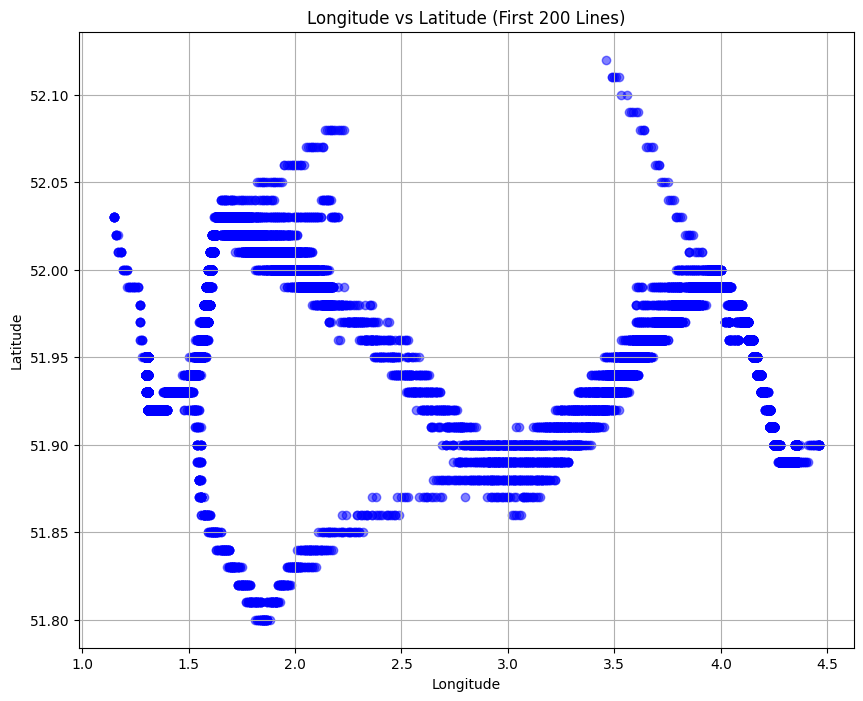

In [40]:
first_2000 = no_duplicates.head(30000)
longitude = first_2000['Longitude']
latitude = first_2000['Latitude']
plt.figure(figsize=(10, 8))
plt.scatter(longitude, latitude, color='blue', alpha=0.5)  

plt.title('Longitude vs Latitude (First 200 Lines)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.grid(True)
plt.show()

In [41]:
first_2000['Time'] = pd.to_datetime(first_2000['time'])
def update_plot(frame):
    # Filter data for current time frame
    current_time = df['Time'].iloc[frame]
    current_data = df[df['Time'] <= current_time]

    # Plot ship's route up to current time
    plt.cla()  # Clear previous plot
    plt.plot(current_data['Longitude'], current_data['Latitude'], color='blue')
    plt.title(f'Ship Route - Time: {current_time}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(True)

# Create an animation
fig = plt.figure(figsize=(10, 8))
ani = FuncAnimation(fig, update_plot, frames=len(df), interval=100, repeat=False)

# Display the animation
plt.show()


/tmp/ipykernel_8576/3463073722.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_2000['Time'] = pd.to_datetime(first_2000['time'])


<Figure size 1000x800 with 0 Axes>

<Axes: xlabel='Longitude', ylabel='Latitude'>

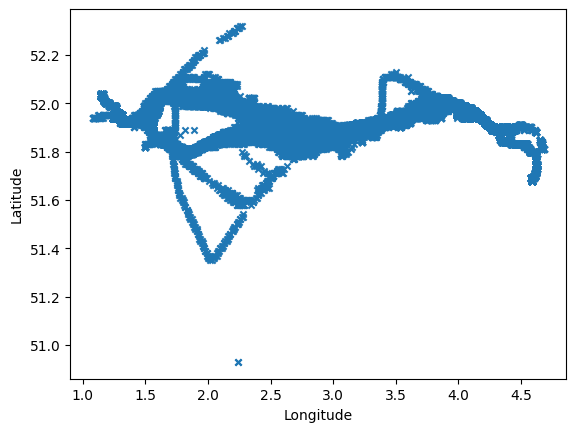

In [42]:
no_duplicates.plot(x="Longitude", y="Latitude", kind="scatter", marker="x")

In [43]:
no_duplicates[no_duplicates.Latitude < 51.2]

,TripID,MMSI,StartLatitude,StartLongitude,StartTime,EndLatitude,EndLongitude,EndTime,StartPort,EndPort,ID,time,shiptype,Length,Breadth,Draught,Latitude,Longitude,SOG,COG,TH,Destination,Name,Callsign,AisSourcen,d
228651,1217523,219458000,51.95,1.31,'2016-03-17 08:53',51.9,4.36,'2016-03-17 17:19',FELIXSTOWE,ROTTERDAM,136464629,'2016-03-17 11:35',70,197,26,6.58,50.93,2.24,15.5,39.3,39,RTM-FXT-RTM,SELANDIA.SEAWAYS,OWLH2,H7001,506
332162,1581349,219458000,51.95,1.31,'2016-03-17 08:53',51.9,4.36,'2016-03-17 17:19',FELIXSTOWE,ROTTERDAM,136464629,'2016-03-17 11:35',70,197,26,6.58,50.93,2.24,15.5,39.3,39,RTM-FXT-RTM,SELANDIA.SEAWAYS,OWLH2,H7001,506


In [44]:
no_duplicates[no_duplicates.Latitude < 51.2]

,TripID,MMSI,StartLatitude,StartLongitude,StartTime,EndLatitude,EndLongitude,EndTime,StartPort,EndPort,ID,time,shiptype,Length,Breadth,Draught,Latitude,Longitude,SOG,COG,TH,Destination,Name,Callsign,AisSourcen,d
228651,1217523,219458000,51.95,1.31,'2016-03-17 08:53',51.9,4.36,'2016-03-17 17:19',FELIXSTOWE,ROTTERDAM,136464629,'2016-03-17 11:35',70,197,26,6.58,50.93,2.24,15.5,39.3,39,RTM-FXT-RTM,SELANDIA.SEAWAYS,OWLH2,H7001,506
332162,1581349,219458000,51.95,1.31,'2016-03-17 08:53',51.9,4.36,'2016-03-17 17:19',FELIXSTOWE,ROTTERDAM,136464629,'2016-03-17 11:35',70,197,26,6.58,50.93,2.24,15.5,39.3,39,RTM-FXT-RTM,SELANDIA.SEAWAYS,OWLH2,H7001,506


In [45]:
no_duplicates[no_duplicates.Latitude > 52.2]

,TripID,MMSI,StartLatitude,StartLongitude,StartTime,EndLatitude,EndLongitude,EndTime,StartPort,EndPort,ID,time,shiptype,Length,Breadth,Draught,Latitude,Longitude,SOG,COG,TH,Destination,Name,Callsign,AisSourcen,d
173233,837581,235095629,51.94,1.24,'2016-01-14 23:16',51.94,4.12,'2016-01-15 08:36',FELIXSTOWE,ROTTERDAM,46776823,'2016-01-15 02:59',70,152,22,4.97,52.31,2.23,13.1,59.7,52,EUROPOORT,CAPUCINE,2FZV8,H7001,560
173237,837581,235095629,51.94,1.24,'2016-01-14 23:16',51.94,4.12,'2016-01-15 08:36',FELIXSTOWE,ROTTERDAM,46790172,'2016-01-15 03:05',70,152,22,4.97,52.32,2.26,13.9,58.9,50,EUROPOORT,CAPUCINE,2FZV8,H7001,560
173257,837581,235095629,51.94,1.24,'2016-01-14 23:16',51.94,4.12,'2016-01-15 08:36',FELIXSTOWE,ROTTERDAM,46821194,'2016-01-15 02:06',70,152,22,4.97,52.21,1.95,14.0,53.3,47,EUROPOORT,CAPUCINE,2FZV8,H7001,560
173264,837581,235095629,51.94,1.24,'2016-01-14 23:16',51.94,4.12,'2016-01-15 08:36',FELIXSTOWE,ROTTERDAM,46838126,'2016-01-15 02:53',70,152,22,4.97,52.29,2.20,13.4,56.5,49,EUROPOORT,CAPUCINE,2FZV8,H7001,560
173281,837581,235095629,51.94,1.24,'2016-01-14 23:16',51.94,4.12,'2016-01-15 08:36',FELIXSTOWE,ROTTERDAM,46796042,'2016-01-15 03:07',70,152,22,4.97,52.32,2.27,14.1,59.7,50,EUROPOORT,CAPUCINE,2FZV8,H7001,560
173291,837581,235095629,51.94,1.24,'2016-01-14 23:16',51.94,4.12,'2016-01-15 08:36',FELIXSTOWE,ROTTERDAM,46743601,'2016-01-15 02:36',70,152,22,4.97,52.26,2.10,13.7,62.1,55,EUROPOORT,CAPUCINE,2FZV8,H7001,560
173422,837581,235095629,51.94,1.24,'2016-01-14 23:16',51.94,4.12,'2016-01-15 08:36',FELIXSTOWE,ROTTERDAM,46775491,'2016-01-15 02:58',70,152,22,4.97,52.30,2.22,13.1,60.3,55,EUROPOORT,CAPUCINE,2FZV8,H7001,560
173423,837581,235095629,51.94,1.24,'2016-01-14 23:16',51.94,4.12,'2016-01-15 08:36',FELIXSTOWE,ROTTERDAM,46776257,'2016-01-15 02:42',70,152,22,4.97,52.27,2.14,13.7,59.6,54,EUROPOORT,CAPUCINE,2FZV8,H7001,560
173425,837581,235095629,51.94,1.24,'2016-01-14 23:16',51.94,4.12,'2016-01-15 08:36',FELIXSTOWE,ROTTERDAM,46779652,'2016-01-15 03:00',70,152,22,4.97,52.31,2.23,13.7,64.0,54,EUROPOORT,CAPUCINE,2FZV8,H7001,560
173428,837581,235095629,51.94,1.24,'2016-01-14 23:16',51.94,4.12,'2016-01-15 08:36',FELIXSTOWE,ROTTERDAM,46781926,'2016-01-15 03:01',70,152,22,4.97,52.31,2.24,14.1,63.3,54,EUROPOORT,CAPUCINE,2FZV8,H7001,560


In [46]:
filtered_mmsis = df[df['MMSI'].astype(str).str.len() == 9]['MMSI']

In [47]:
filtered_mmsis

0         220284000
1         220284000
2         220284000
3         220284000
4         220284000
            ...    
527307    220417000
527308    220417000
527309    220417000
527310    220417000
527311    220417000
Name: MMSI, Length: 527312, dtype: int64

In [48]:
sorted_rows = no_duplicates.sort_values(by=['TripID', 'MMSI', 'Destination', 'Callsign'])

In [49]:
sorted_rows

,TripID,MMSI,StartLatitude,StartLongitude,StartTime,EndLatitude,EndLongitude,EndTime,StartPort,EndPort,ID,time,shiptype,Length,Breadth,Draught,Latitude,Longitude,SOG,COG,TH,Destination,Name,Callsign,AisSourcen,d
3136,2778,211226860,51.94,1.54,'2016-01-25 14:51',51.97,4.02,'2016-01-25 23:47',FELIXSTOWE,ROTTERDAM,55715308,'2016-01-25 21:27',0,0,0,6.0,51.94,3.49,11.7,76.9,75,?,?,?,H7001,536
2944,2778,211226860,51.94,1.54,'2016-01-25 14:51',51.97,4.02,'2016-01-25 23:47',FELIXSTOWE,ROTTERDAM,55284795,'2016-01-25 14:51',71,101,19,6.0,51.94,1.54,13.6,67.7,72,FELIXSTOWE,GERDA,DPGK,H7001,536
2945,2778,211226860,51.94,1.54,'2016-01-25 14:51',51.97,4.02,'2016-01-25 23:47',FELIXSTOWE,ROTTERDAM,55285785,'2016-01-25 14:52',71,101,19,6.0,51.95,1.54,13.6,66.9,71,FELIXSTOWE,GERDA,DPGK,H7001,536
2946,2778,211226860,51.94,1.54,'2016-01-25 14:51',51.97,4.02,'2016-01-25 23:47',FELIXSTOWE,ROTTERDAM,55286989,'2016-01-25 14:53',71,101,19,6.0,51.95,1.55,13.6,65.7,66,FELIXSTOWE,GERDA,DPGK,H7001,536
2947,2778,211226860,51.94,1.54,'2016-01-25 14:51',51.97,4.02,'2016-01-25 23:47',FELIXSTOWE,ROTTERDAM,55287981,'2016-01-25 14:54',71,101,19,6.0,51.95,1.55,13.6,51.9,56,FELIXSTOWE,GERDA,DPGK,H7001,536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519507,2231779,229927000,51.94,1.31,'2016-05-07 17:49',51.97,4.03,'2016-05-08 03:46',FELIXSTOWE,ROTTERDAM,250025959,'2016-05-08 03:42',4,400,59,13.63,51.97,4.03,2.0,305.4,299,GBFXT-NLRTM,AL.DAHNA,9HA3724,H7001,597
519508,2231779,229927000,51.94,1.31,'2016-05-07 17:49',51.97,4.03,'2016-05-08 03:46',FELIXSTOWE,ROTTERDAM,250027477,'2016-05-08 03:43',4,400,59,13.63,51.97,4.03,1.5,309.8,300,GBFXT-NLRTM,AL.DAHNA,9HA3724,H7001,597
519509,2231779,229927000,51.94,1.31,'2016-05-07 17:49',51.97,4.03,'2016-05-08 03:46',FELIXSTOWE,ROTTERDAM,250028222,'2016-05-08 03:44',4,400,59,13.63,51.97,4.03,1.2,313.0,301,GBFXT-NLRTM,AL.DAHNA,9HA3724,H7001,597
519510,2231779,229927000,51.94,1.31,'2016-05-07 17:49',51.97,4.03,'2016-05-08 03:46',FELIXSTOWE,ROTTERDAM,250029214,'2016-05-08 03:45',4,400,59,13.63,51.97,4.03,0.9,314.6,299,GBFXT-NLRTM,AL.DAHNA,9HA3724,H7001,597


In [50]:
sorted_rows.to_csv('sorted_rows.csv', index=False) 

Checking if Destination and Departure locations do make sense
1. Destination cannot be = Start port

Some destination columns have the value Felixstowe which is wrong.
1. I will first replace the values with ? to make interpolation better and have consistent missing values overall.


In [51]:
sorted_rows.loc[sorted_rows['Destination'] == 'FELIXSTOWE']

,TripID,MMSI,StartLatitude,StartLongitude,StartTime,EndLatitude,EndLongitude,EndTime,StartPort,EndPort,ID,time,shiptype,Length,Breadth,Draught,Latitude,Longitude,SOG,COG,TH,Destination,Name,Callsign,AisSourcen,d
2944,2778,211226860,51.94,1.54,'2016-01-25 14:51',51.97,4.02,'2016-01-25 23:47',FELIXSTOWE,ROTTERDAM,55284795,'2016-01-25 14:51',71,101,19,6.0,51.94,1.54,13.6,67.7,72,FELIXSTOWE,GERDA,DPGK,H7001,536
2945,2778,211226860,51.94,1.54,'2016-01-25 14:51',51.97,4.02,'2016-01-25 23:47',FELIXSTOWE,ROTTERDAM,55285785,'2016-01-25 14:52',71,101,19,6.0,51.95,1.54,13.6,66.9,71,FELIXSTOWE,GERDA,DPGK,H7001,536
2946,2778,211226860,51.94,1.54,'2016-01-25 14:51',51.97,4.02,'2016-01-25 23:47',FELIXSTOWE,ROTTERDAM,55286989,'2016-01-25 14:53',71,101,19,6.0,51.95,1.55,13.6,65.7,66,FELIXSTOWE,GERDA,DPGK,H7001,536
2947,2778,211226860,51.94,1.54,'2016-01-25 14:51',51.97,4.02,'2016-01-25 23:47',FELIXSTOWE,ROTTERDAM,55287981,'2016-01-25 14:54',71,101,19,6.0,51.95,1.55,13.6,51.9,56,FELIXSTOWE,GERDA,DPGK,H7001,536
2948,2778,211226860,51.94,1.54,'2016-01-25 14:51',51.97,4.02,'2016-01-25 23:47',FELIXSTOWE,ROTTERDAM,55289128,'2016-01-25 14:55',71,101,19,6.0,51.95,1.56,13.7,55.1,58,FELIXSTOWE,GERDA,DPGK,H7001,536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454357,1672495,636016433,51.92,1.36,'2017-03-26 00:33',51.95,4.06,'2017-03-26 13:52',FELIXSTOWE,ROTTERDAM,1586672060,'2017-03-26 00:33',71,277,40,12.4,51.92,1.36,16.0,76.0,80,FELIXSTOWE,MSC.VIDHI,D5GE2,H7001,739
454368,1672495,636016433,51.92,1.36,'2017-03-26 00:33',51.95,4.06,'2017-03-26 13:52',FELIXSTOWE,ROTTERDAM,1586678454,'2017-03-26 00:37',71,277,40,12.4,51.92,1.39,16.5,86.0,87,FELIXSTOWE,MSC.VIDHI,D5GE2,H7001,739
454369,1672495,636016433,51.92,1.36,'2017-03-26 00:33',51.95,4.06,'2017-03-26 13:52',FELIXSTOWE,ROTTERDAM,1586680041,'2017-03-26 00:38',71,277,40,12.4,51.93,1.40,16.6,86.0,87,FELIXSTOWE,MSC.VIDHI,D5GE2,H7001,739
454370,1672495,636016433,51.92,1.36,'2017-03-26 00:33',51.95,4.06,'2017-03-26 13:52',FELIXSTOWE,ROTTERDAM,1586681647,'2017-03-26 00:39',71,277,40,12.4,51.93,1.41,16.4,85.0,87,FELIXSTOWE,MSC.VIDHI,D5GE2,H7001,739


3136                ?
2944                ?
2945                ?
2946                ?
2947                ?
             ...     
519507    GBFXT-NLRTM
519508    GBFXT-NLRTM
519509    GBFXT-NLRTM
519510    GBFXT-NLRTM
519511    GBFXT-NLRTM
Name: Destination, Length: 517569, dtype: object

In [53]:
sorted_rows

,TripID,MMSI,StartLatitude,StartLongitude,StartTime,EndLatitude,EndLongitude,EndTime,StartPort,EndPort,ID,time,shiptype,Length,Breadth,Draught,Latitude,Longitude,SOG,COG,TH,Destination,Name,Callsign,AisSourcen,d
3136,2778,211226860,51.94,1.54,'2016-01-25 14:51',51.97,4.02,'2016-01-25 23:47',FELIXSTOWE,ROTTERDAM,55715308,'2016-01-25 21:27',0,0,0,6.0,51.94,3.49,11.7,76.9,75,?,?,?,H7001,536
2944,2778,211226860,51.94,1.54,'2016-01-25 14:51',51.97,4.02,'2016-01-25 23:47',FELIXSTOWE,ROTTERDAM,55284795,'2016-01-25 14:51',71,101,19,6.0,51.94,1.54,13.6,67.7,72,FELIXSTOWE,GERDA,DPGK,H7001,536
2945,2778,211226860,51.94,1.54,'2016-01-25 14:51',51.97,4.02,'2016-01-25 23:47',FELIXSTOWE,ROTTERDAM,55285785,'2016-01-25 14:52',71,101,19,6.0,51.95,1.54,13.6,66.9,71,FELIXSTOWE,GERDA,DPGK,H7001,536
2946,2778,211226860,51.94,1.54,'2016-01-25 14:51',51.97,4.02,'2016-01-25 23:47',FELIXSTOWE,ROTTERDAM,55286989,'2016-01-25 14:53',71,101,19,6.0,51.95,1.55,13.6,65.7,66,FELIXSTOWE,GERDA,DPGK,H7001,536
2947,2778,211226860,51.94,1.54,'2016-01-25 14:51',51.97,4.02,'2016-01-25 23:47',FELIXSTOWE,ROTTERDAM,55287981,'2016-01-25 14:54',71,101,19,6.0,51.95,1.55,13.6,51.9,56,FELIXSTOWE,GERDA,DPGK,H7001,536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519507,2231779,229927000,51.94,1.31,'2016-05-07 17:49',51.97,4.03,'2016-05-08 03:46',FELIXSTOWE,ROTTERDAM,250025959,'2016-05-08 03:42',4,400,59,13.63,51.97,4.03,2.0,305.4,299,GBFXT-NLRTM,AL.DAHNA,9HA3724,H7001,597
519508,2231779,229927000,51.94,1.31,'2016-05-07 17:49',51.97,4.03,'2016-05-08 03:46',FELIXSTOWE,ROTTERDAM,250027477,'2016-05-08 03:43',4,400,59,13.63,51.97,4.03,1.5,309.8,300,GBFXT-NLRTM,AL.DAHNA,9HA3724,H7001,597
519509,2231779,229927000,51.94,1.31,'2016-05-07 17:49',51.97,4.03,'2016-05-08 03:46',FELIXSTOWE,ROTTERDAM,250028222,'2016-05-08 03:44',4,400,59,13.63,51.97,4.03,1.2,313.0,301,GBFXT-NLRTM,AL.DAHNA,9HA3724,H7001,597
519510,2231779,229927000,51.94,1.31,'2016-05-07 17:49',51.97,4.03,'2016-05-08 03:46',FELIXSTOWE,ROTTERDAM,250029214,'2016-05-08 03:45',4,400,59,13.63,51.97,4.03,0.9,314.6,299,GBFXT-NLRTM,AL.DAHNA,9HA3724,H7001,597


In [64]:
sorted_rows2 = sorted_rows

def interpolate_columns(df, target_columns=['Destination', 'Name', 'Callsign']):

    last_values = {col: None for col in target_columns}

    for index, row in df.iterrows():
        trip_id = row['TripID']
        for col in target_columns:
            if row[col] != '?':
                last_values[col] = row[col]
            elif row[col] == '?' and last_values[col] is not None:
                df.at[index, col] = last_values[col]


    return df

clean_df = interpolate_columns(sorted_rows2)
clean_df.to_csv('felixstowe_rotterdam_clean.csv', index=False)

,TripID,MMSI,StartLatitude,StartLongitude,StartTime,EndLatitude,EndLongitude,EndTime,StartPort,EndPort,ID,time,shiptype,Length,Breadth,Draught,Latitude,Longitude,SOG,COG,TH,Destination,Name,Callsign,AisSourcen,d
3136,2778,211226860,51.94,1.54,'2016-01-25 14:51',51.97,4.02,'2016-01-25 23:47',FELIXSTOWE,ROTTERDAM,55715308,'2016-01-25 21:27',0,0,0,6.0,51.94,3.49,11.7,76.9,75,?,?,?,H7001,536
2944,2778,211226860,51.94,1.54,'2016-01-25 14:51',51.97,4.02,'2016-01-25 23:47',FELIXSTOWE,ROTTERDAM,55284795,'2016-01-25 14:51',71,101,19,6.0,51.94,1.54,13.6,67.7,72,FELIXSTOWE,GERDA,DPGK,H7001,536
2945,2778,211226860,51.94,1.54,'2016-01-25 14:51',51.97,4.02,'2016-01-25 23:47',FELIXSTOWE,ROTTERDAM,55285785,'2016-01-25 14:52',71,101,19,6.0,51.95,1.54,13.6,66.9,71,FELIXSTOWE,GERDA,DPGK,H7001,536
2946,2778,211226860,51.94,1.54,'2016-01-25 14:51',51.97,4.02,'2016-01-25 23:47',FELIXSTOWE,ROTTERDAM,55286989,'2016-01-25 14:53',71,101,19,6.0,51.95,1.55,13.6,65.7,66,FELIXSTOWE,GERDA,DPGK,H7001,536
2947,2778,211226860,51.94,1.54,'2016-01-25 14:51',51.97,4.02,'2016-01-25 23:47',FELIXSTOWE,ROTTERDAM,55287981,'2016-01-25 14:54',71,101,19,6.0,51.95,1.55,13.6,51.9,56,FELIXSTOWE,GERDA,DPGK,H7001,536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519507,2231779,229927000,51.94,1.31,'2016-05-07 17:49',51.97,4.03,'2016-05-08 03:46',FELIXSTOWE,ROTTERDAM,250025959,'2016-05-08 03:42',4,400,59,13.63,51.97,4.03,2.0,305.4,299,GBFXT-NLRTM,AL.DAHNA,9HA3724,H7001,597
519508,2231779,229927000,51.94,1.31,'2016-05-07 17:49',51.97,4.03,'2016-05-08 03:46',FELIXSTOWE,ROTTERDAM,250027477,'2016-05-08 03:43',4,400,59,13.63,51.97,4.03,1.5,309.8,300,GBFXT-NLRTM,AL.DAHNA,9HA3724,H7001,597
519509,2231779,229927000,51.94,1.31,'2016-05-07 17:49',51.97,4.03,'2016-05-08 03:46',FELIXSTOWE,ROTTERDAM,250028222,'2016-05-08 03:44',4,400,59,13.63,51.97,4.03,1.2,313.0,301,GBFXT-NLRTM,AL.DAHNA,9HA3724,H7001,597
519510,2231779,229927000,51.94,1.31,'2016-05-07 17:49',51.97,4.03,'2016-05-08 03:46',FELIXSTOWE,ROTTERDAM,250029214,'2016-05-08 03:45',4,400,59,13.63,51.97,4.03,0.9,314.6,299,GBFXT-NLRTM,AL.DAHNA,9HA3724,H7001,597


In [65]:
clean_df.drop(clean_df.loc[clean_df['Destination']== 'FELIXSTOWE'].index, inplace=True)

In [71]:
clean_df

,TripID,MMSI,StartLatitude,StartLongitude,StartTime,EndLatitude,EndLongitude,EndTime,StartPort,EndPort,ID,time,shiptype,Length,Breadth,Draught,Latitude,Longitude,SOG,COG,TH,Destination,Name,Callsign,AisSourcen,d
3136,2778,211226860,51.94,1.54,'2016-01-25 14:51',51.97,4.02,'2016-01-25 23:47',FELIXSTOWE,ROTTERDAM,55715308,'2016-01-25 21:27',0,0,0,6.0,51.94,3.49,11.7,76.9,75,?,?,?,H7001,536
2950,2778,211226860,51.94,1.54,'2016-01-25 14:51',51.97,4.02,'2016-01-25 23:47',FELIXSTOWE,ROTTERDAM,55291997,'2016-01-25 14:57',71,101,19,6.0,51.96,1.57,13.9,44.9,48,ROTTERDAM,GERDA,DPGK,H7001,536
2951,2778,211226860,51.94,1.54,'2016-01-25 14:51',51.97,4.02,'2016-01-25 23:47',FELIXSTOWE,ROTTERDAM,55293216,'2016-01-25 14:58',71,101,19,6.0,51.96,1.57,14.0,45.8,40,ROTTERDAM,GERDA,DPGK,H7001,536
2952,2778,211226860,51.94,1.54,'2016-01-25 14:51',51.97,4.02,'2016-01-25 23:47',FELIXSTOWE,ROTTERDAM,55294182,'2016-01-25 14:59',71,101,19,6.0,51.96,1.58,13.8,30.8,24,ROTTERDAM,GERDA,DPGK,H7001,536
2953,2778,211226860,51.94,1.54,'2016-01-25 14:51',51.97,4.02,'2016-01-25 23:47',FELIXSTOWE,ROTTERDAM,55295659,'2016-01-25 15:00',71,101,19,6.0,51.97,1.58,13.8,22.1,20,ROTTERDAM,GERDA,DPGK,H7001,536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519507,2231779,229927000,51.94,1.31,'2016-05-07 17:49',51.97,4.03,'2016-05-08 03:46',FELIXSTOWE,ROTTERDAM,250025959,'2016-05-08 03:42',4,400,59,13.63,51.97,4.03,2.0,305.4,299,GBFXT-NLRTM,AL.DAHNA,9HA3724,H7001,597
519508,2231779,229927000,51.94,1.31,'2016-05-07 17:49',51.97,4.03,'2016-05-08 03:46',FELIXSTOWE,ROTTERDAM,250027477,'2016-05-08 03:43',4,400,59,13.63,51.97,4.03,1.5,309.8,300,GBFXT-NLRTM,AL.DAHNA,9HA3724,H7001,597
519509,2231779,229927000,51.94,1.31,'2016-05-07 17:49',51.97,4.03,'2016-05-08 03:46',FELIXSTOWE,ROTTERDAM,250028222,'2016-05-08 03:44',4,400,59,13.63,51.97,4.03,1.2,313.0,301,GBFXT-NLRTM,AL.DAHNA,9HA3724,H7001,597
519510,2231779,229927000,51.94,1.31,'2016-05-07 17:49',51.97,4.03,'2016-05-08 03:46',FELIXSTOWE,ROTTERDAM,250029214,'2016-05-08 03:45',4,400,59,13.63,51.97,4.03,0.9,314.6,299,GBFXT-NLRTM,AL.DAHNA,9HA3724,H7001,597


In [67]:
clean_df2 = clean_df[clean_df['Latitude'] >= 51.2]

In [68]:
clean_df3 = clean_df[clean_df['Longitude'] <= 52.2]

In [69]:
clean_df3 = clean_df3.drop_duplicates()

In [70]:
clean_df3.to_csv('felixstowe_rotterdam_clean3.csv', index=False)